# 날씨 데이터 분포 분석 (Weather Data Distribution Analysis)

이 노트북은 `data/raw/weather_data.json` 파일의 데이터 분포를 분석하고,
기계학습에 유용한 통계 정보와 시각화를 제공합니다.

## 분석 항목
- 기본 통계량 (평균, 중앙값, 최소값, 최대값, 표준편차 등)
- 결측치 분석
- 데이터 분포 시각화 (히스토그램)
- 변수 간 상관관계
- 시계열 분석
- 관측소별 비교

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# 한글 폰트 설정 (matplotlib에서 한글 표시를 위함)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


## 1. 데이터 로드

In [2]:
# 데이터 파일 경로
data_path = Path('../data/raw/weather_data.json')

# JSON 파일 로드
with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# DataFrame으로 변환
df = pd.DataFrame(data)

print(f"데이터 로드 완료! 총 {len(df)}개의 레코드")
df.head(10)

데이터 로드 완료! 총 150개의 레코드


,tm,stnId,stnNm,avgTs,avgRhm,minTa,maxTa,avgTa,sumRn,avgWs
0,2025-05-26,108,서울,24.6,59.4,13.0,26.2,19.7,,1.7
1,2025-05-27,108,서울,25.7,57.0,14.7,27.0,20.8,,1.9
2,2025-05-28,108,서울,24.9,62.0,16.3,26.9,20.8,0.0,1.8
3,2025-05-29,108,서울,25.0,58.4,15.3,27.3,21.2,,2.2
4,2025-05-30,108,서울,27.2,55.0,16.7,28.3,22.2,,1.7
5,2025-05-31,108,서울,26.4,55.0,16.4,27.0,21.5,,2.0
6,2025-06-01,108,서울,29.8,57.8,17.0,29.3,22.6,,2.0
7,2025-06-02,108,서울,21.8,64.3,19.2,23.1,21.0,0.0,1.5
8,2025-06-03,108,서울,28.0,56.9,17.0,25.3,20.9,,2.9
9,2025-06-04,108,서울,29.2,55.3,15.2,25.3,20.5,,3.5


## 2. 기본 정보 확인

In [3]:
# 데이터 기본 정보
print("=" * 60)
print("데이터 기본 정보")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("데이터 형태 (Shape)")
print("=" * 60)
print(f"행(Rows): {df.shape[0]}")
print(f"열(Columns): {df.shape[1]}")

print("\n" + "=" * 60)
print("컬럼 목록")
print("=" * 60)
for col in df.columns:
    print(f"- {col}")

데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tm      150 non-null    object
 1   stnId   150 non-null    object
 2   stnNm   150 non-null    object
 3   avgTs   150 non-null    object
 4   avgRhm  150 non-null    object
 5   minTa   150 non-null    object
 6   maxTa   150 non-null    object
 7   avgTa   150 non-null    object
 8   sumRn   150 non-null    object
 9   avgWs   150 non-null    object
dtypes: object(10)
memory usage: 11.8+ KB

데이터 형태 (Shape)
행(Rows): 150
열(Columns): 10

컬럼 목록
- tm
- stnId
- stnNm
- avgTs
- avgRhm
- minTa
- maxTa
- avgTa
- sumRn
- avgWs


## 3. 데이터 타입 변환 및 전처리

In [4]:
# 날짜 컬럼을 datetime 타입으로 변환
df['tm'] = pd.to_datetime(df['tm'])

# 수치형 컬럼 목록
numeric_columns = ['avgTs', 'avgRhm', 'minTa', 'maxTa', 'avgTa', 'sumRn', 'avgWs']

# 빈 문자열을 NaN으로 변환 후 수치형으로 변환
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('', np.nan), errors='coerce')

print("데이터 타입 변환 완료!")
print("\n변환 후 데이터 타입:")
print(df.dtypes)

데이터 타입 변환 완료!

변환 후 데이터 타입:
tm        datetime64[ns]
stnId             object
stnNm             object
avgTs            float64
avgRhm           float64
minTa            float64
maxTa            float64
avgTa            float64
sumRn            float64
avgWs            float64
dtype: object


## 4. 결측치 분석

결측치 분석
        결측치 개수  결측치 비율(%)  유효 데이터 개수  전체 데이터 개수
tm           0        0.0        150        150
stnId        0        0.0        150        150
stnNm        0        0.0        150        150
avgTs        0        0.0        150        150
avgRhm       0        0.0        150        150
minTa        0        0.0        150        150
maxTa        0        0.0        150        150
avgTa        0        0.0        150        150
sumRn       93       62.0         57        150
avgWs        0        0.0        150        150


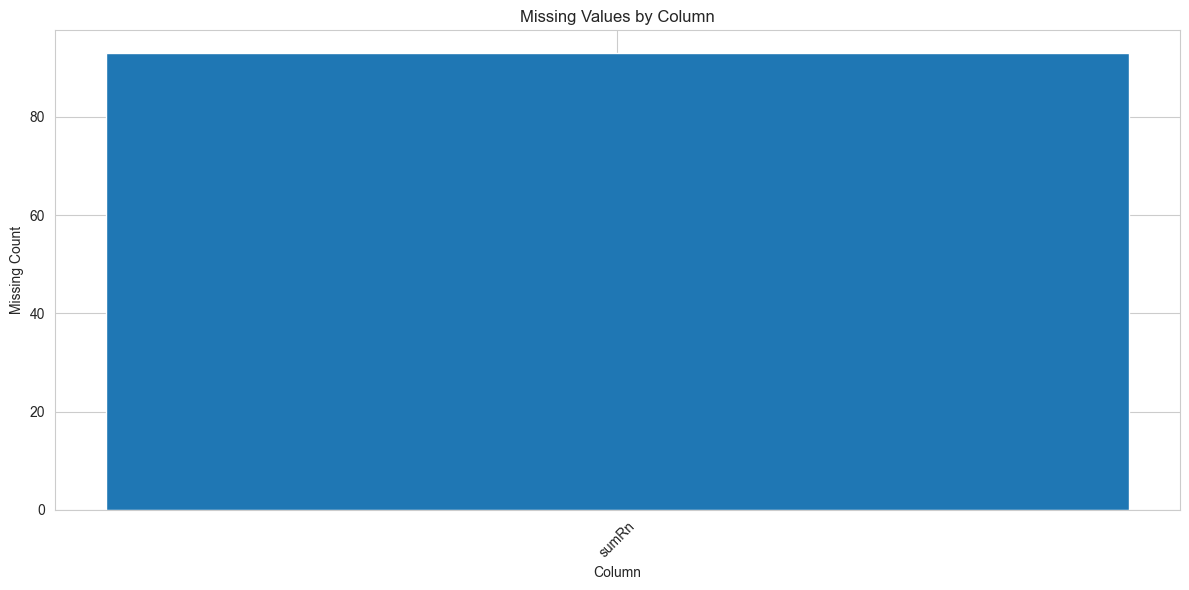

In [5]:
# 결측치 개수 및 비율
missing_data = pd.DataFrame({
    '결측치 개수': df.isnull().sum(),
    '결측치 비율(%)': (df.isnull().sum() / len(df) * 100).round(2),
    '유효 데이터 개수': df.count(),
    '전체 데이터 개수': len(df)
})

print("=" * 80)
print("결측치 분석")
print("=" * 80)
print(missing_data)

# 결측치 시각화
plt.figure(figsize=(12, 6))
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if len(missing_counts) > 0:
    plt.bar(range(len(missing_counts)), missing_counts.values)
    plt.xticks(range(len(missing_counts)), missing_counts.index, rotation=45)
    plt.xlabel('Column')
    plt.ylabel('Missing Count')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\n결측치가 없습니다!")

## 5. 기본 통계량

In [6]:
# 기본 통계량 계산
print("=" * 80)
print("수치형 변수 기본 통계량")
print("=" * 80)
print(df[numeric_columns].describe())

# 추가 통계량
additional_stats = pd.DataFrame({
    '중앙값(Median)': df[numeric_columns].median(),
    '최빈값(Mode)': df[numeric_columns].mode().iloc[0] if len(df[numeric_columns].mode()) > 0 else np.nan,
    '왜도(Skewness)': df[numeric_columns].skew(),
    '첨도(Kurtosis)': df[numeric_columns].kurtosis()
})

print("\n" + "=" * 80)
print("추가 통계량")
print("=" * 80)
print(additional_stats)

수치형 변수 기본 통계량
            avgTs      avgRhm       minTa       maxTa      avgTa       sumRn  \
count  150.000000  150.000000  150.000000  150.000000  150.00000   57.000000   
mean    29.944000   67.905333   19.976667   30.085333   24.72000   11.026316   
std      4.855558   11.702382    4.171321    3.555191    3.35153   22.762308   
min     21.500000   41.800000    9.600000   20.700000   17.90000    0.000000   
25%     26.300000   58.325000   17.000000   27.600000   22.00000    0.000000   
50%     29.150000   69.800000   19.900000   30.150000   24.65000    1.100000   
75%     32.900000   75.800000   23.675000   32.750000   27.77500   11.800000   
max     39.800000   94.100000   27.400000   37.800000   31.90000  133.500000   

            avgWs  
count  150.000000  
mean     1.770667  
std      0.668620  
min      0.700000  
25%      1.200000  
50%      1.700000  
75%      2.200000  
max      3.900000  

추가 통계량
        중앙값(Median)  최빈값(Mode)  왜도(Skewness)  첨도(Kurtosis)
avgTs         29.1

## 6. 관측소별 통계

In [7]:
# 관측소별 데이터 개수
print("=" * 80)
print("관측소별 데이터 개수")
print("=" * 80)
station_counts = df['stnNm'].value_counts()
print(station_counts)

# 관측소별 평균 통계
print("\n" + "=" * 80)
print("관측소별 평균 통계")
print("=" * 80)
station_stats = df.groupby('stnNm')[numeric_columns].mean()
print(station_stats.round(2))

관측소별 데이터 개수
stnNm
서울    50
안동    50
광주    50
Name: count, dtype: int64

관측소별 평균 통계
       avgTs  avgRhm  minTa  maxTa  avgTa  sumRn  avgWs
stnNm                                                  
광주     31.06   68.80  20.39  30.18  24.91  19.77   1.52
서울     28.08   66.99  21.08  29.67  25.07   4.98   2.31
안동     30.69   67.93  18.46  30.40  24.17  12.21   1.49


## 7. 데이터 분포 시각화 - 히스토그램

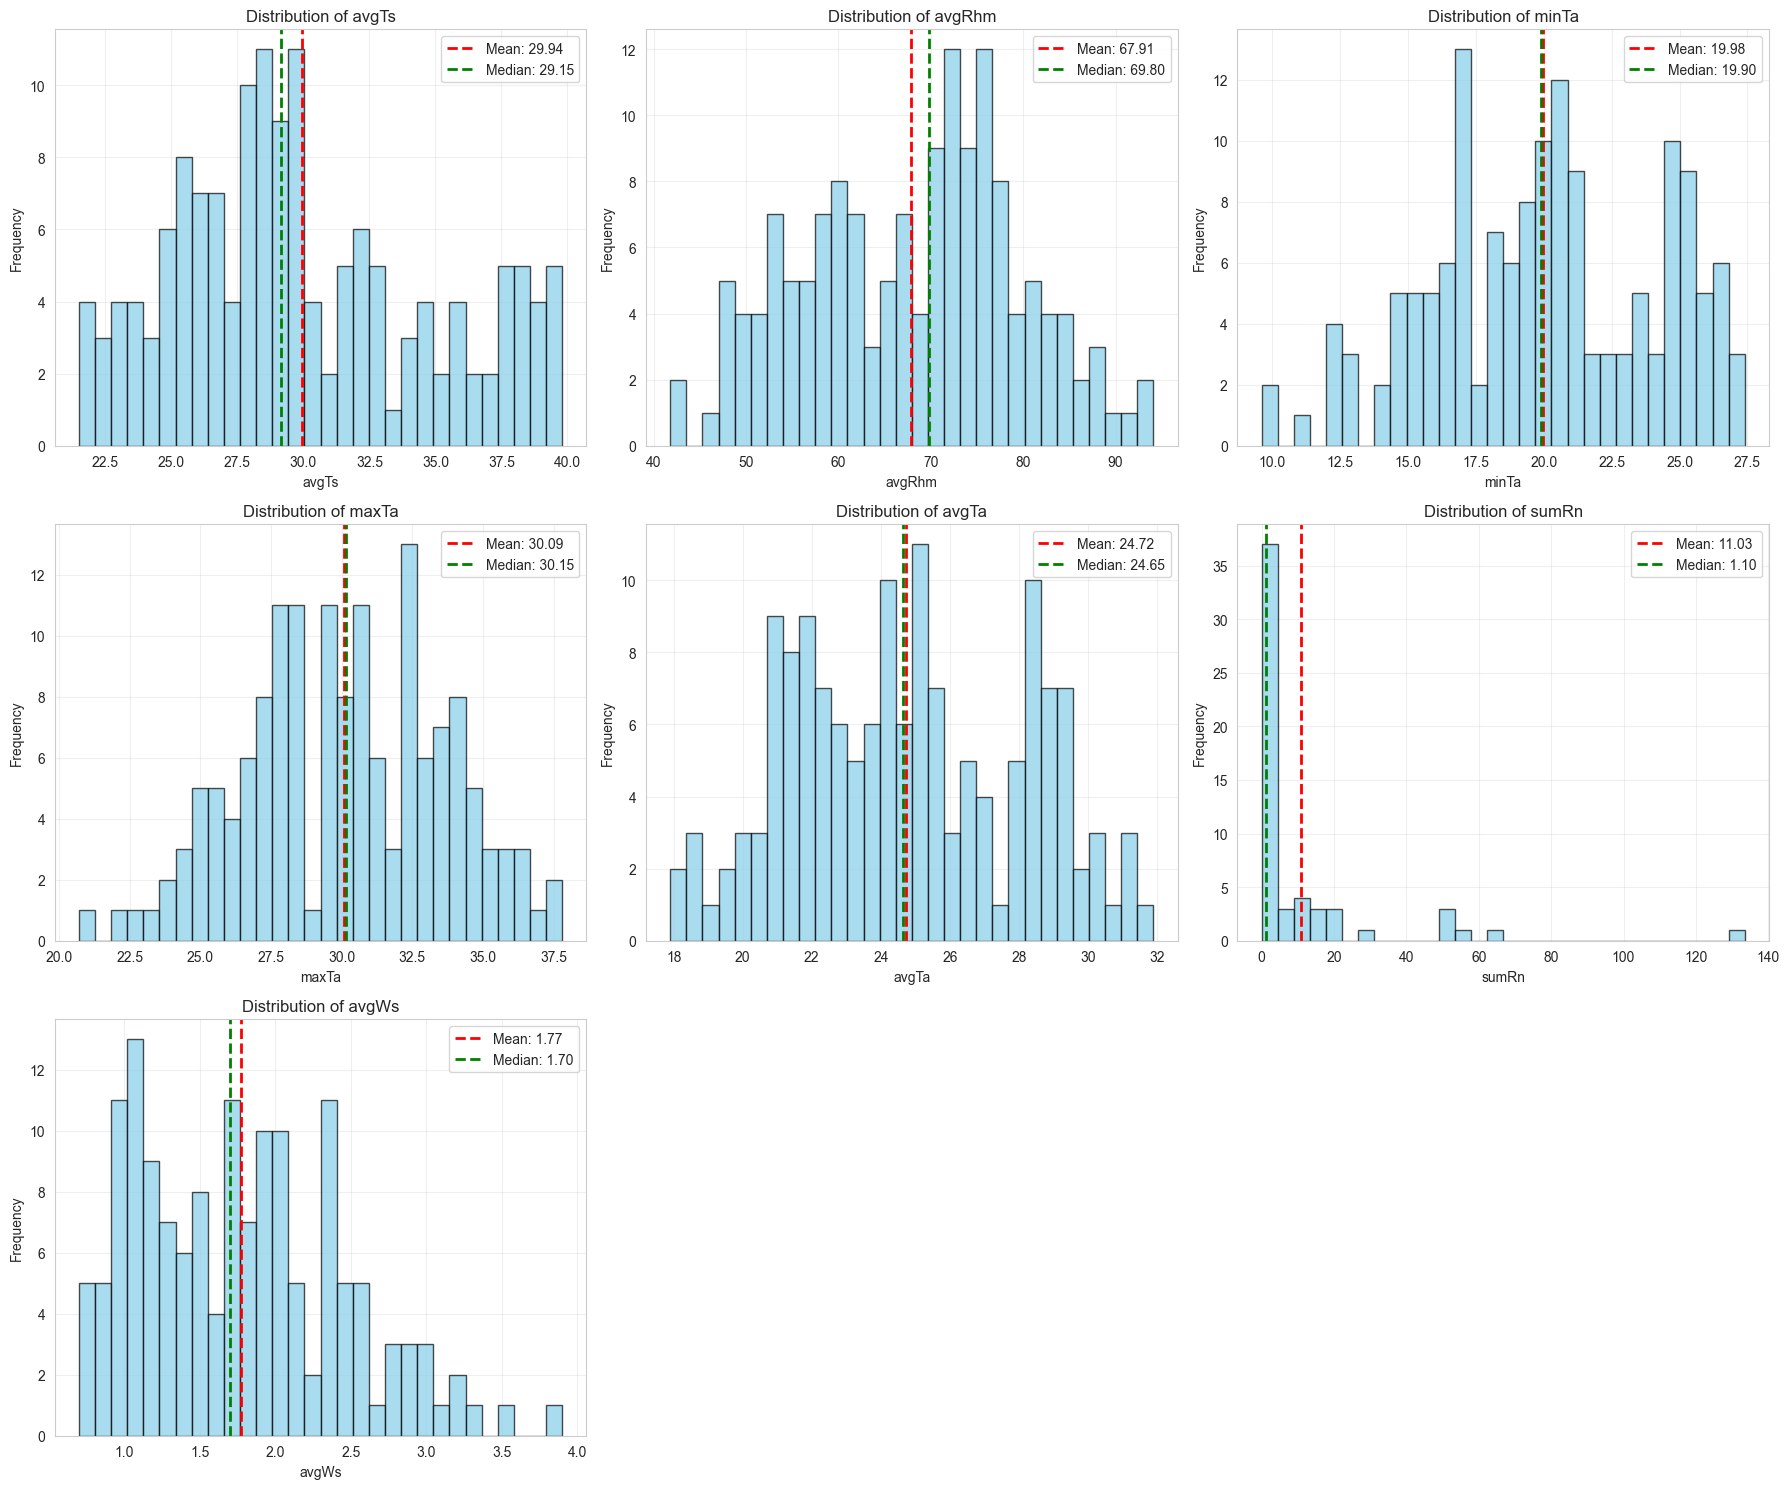

In [8]:
# 각 수치형 변수의 히스토그램
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        # 결측치 제거
        data = df[col].dropna()
        
        # 히스토그램
        axes[idx].hist(data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
        axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

# 남은 subplot 제거
for idx in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 8. 박스 플롯 (Box Plot) - 이상치 탐지

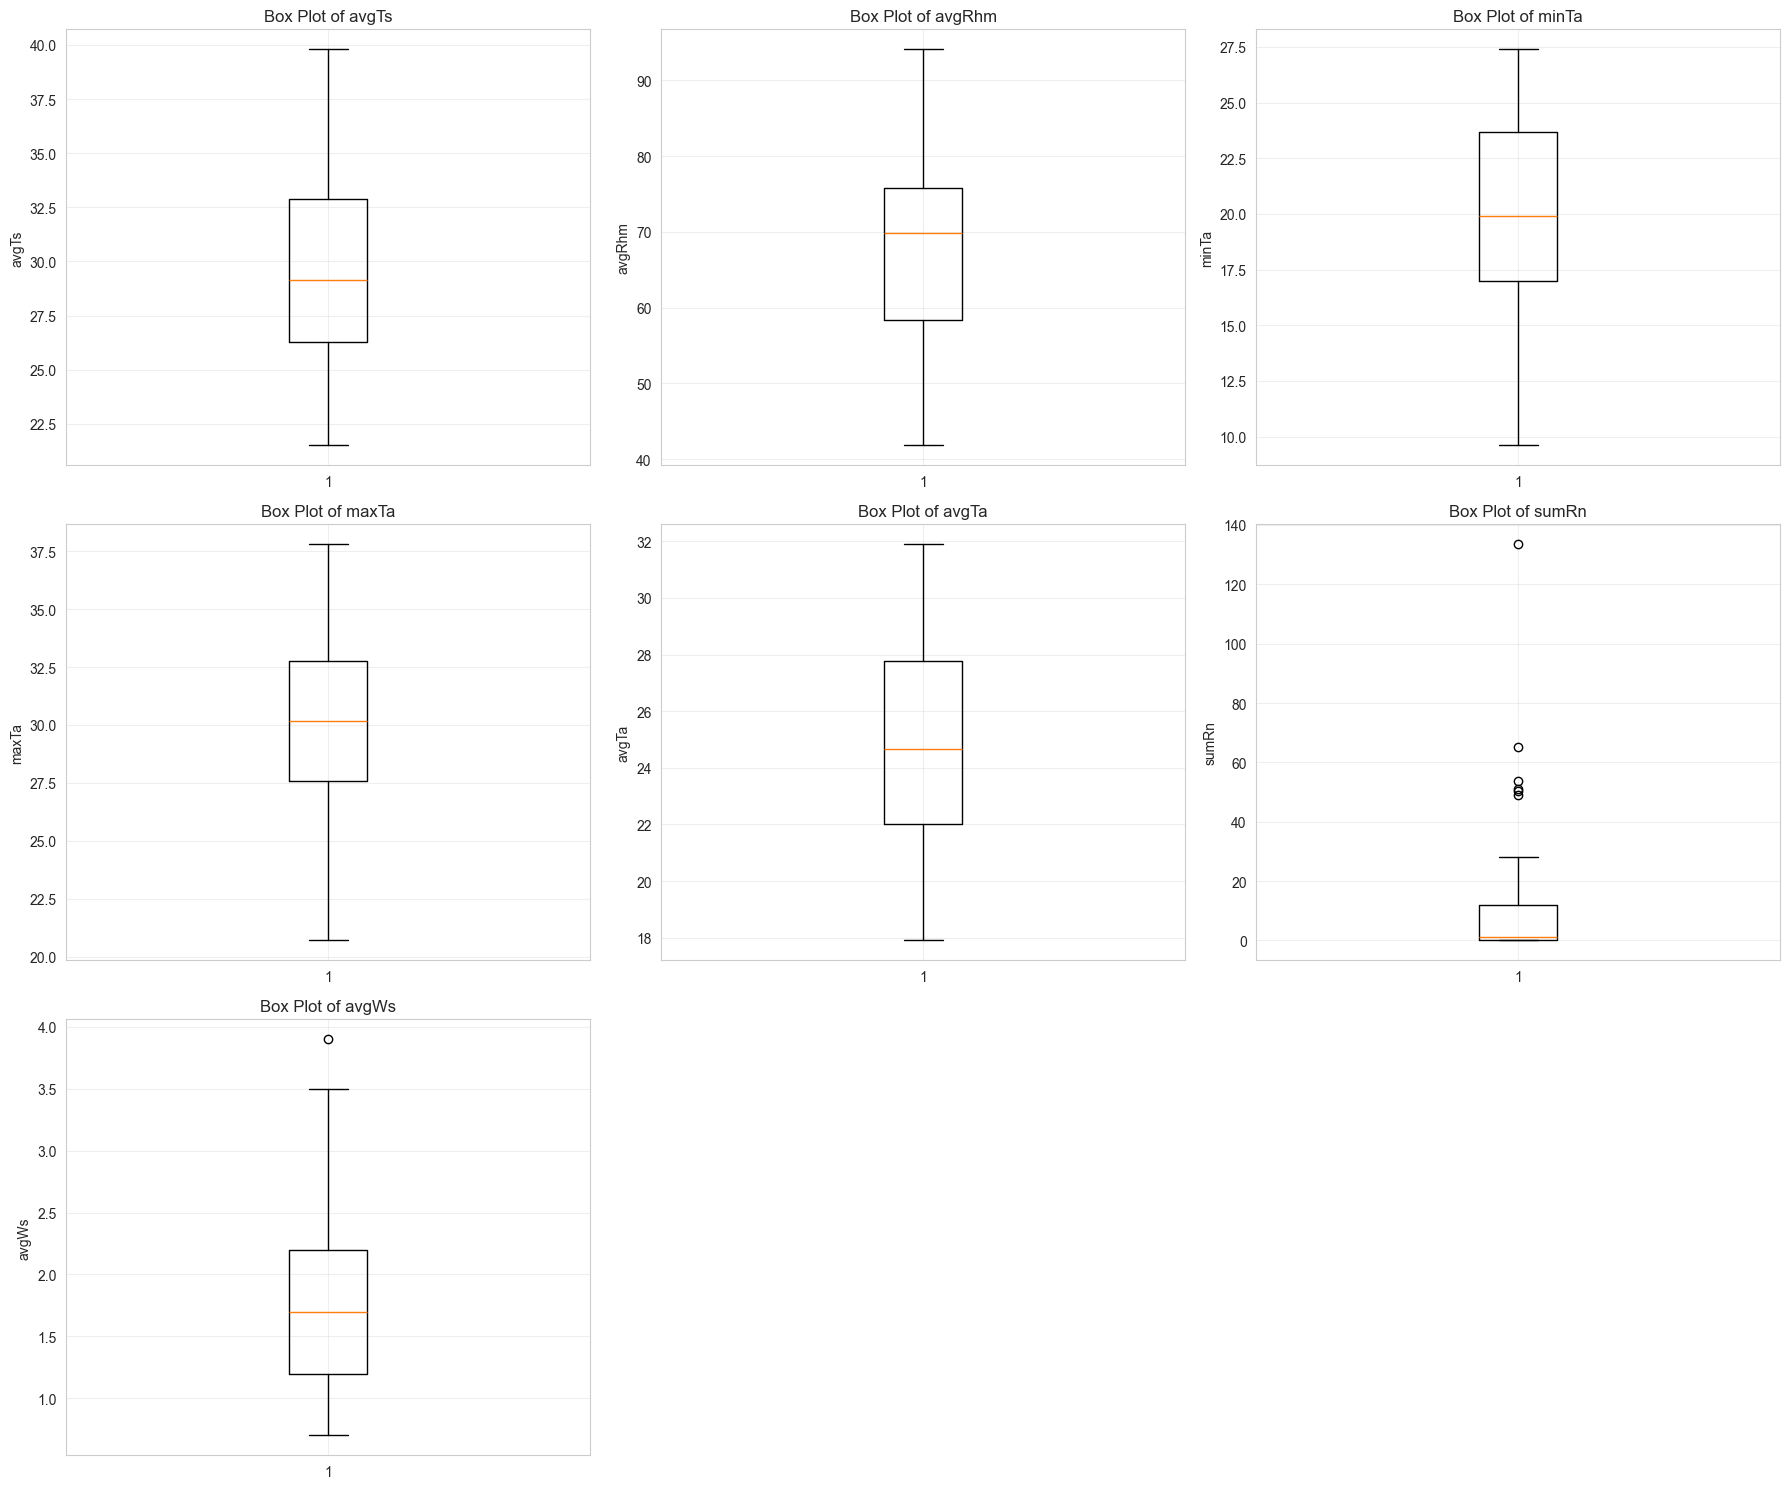

In [9]:
# 박스 플롯으로 이상치 확인
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        data = df[col].dropna()
        axes[idx].boxplot(data, vert=True)
        axes[idx].set_ylabel(col)
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].grid(True, alpha=0.3)

# 남은 subplot 제거
for idx in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 9. 상관관계 분석

상관관계 행렬
        avgTs  avgRhm  minTa  maxTa  avgTa  sumRn  avgWs
avgTs   1.000  -0.323  0.472  0.847  0.725 -0.214  0.041
avgRhm -0.323   1.000  0.356 -0.224  0.055  0.492 -0.079
minTa   0.472   0.356  1.000  0.624  0.895 -0.180  0.307
maxTa   0.847  -0.224  0.624  1.000  0.888 -0.142  0.075
avgTa   0.725   0.055  0.895  0.888  1.000 -0.183  0.231
sumRn  -0.214   0.492 -0.180 -0.142 -0.183  1.000  0.071
avgWs   0.041  -0.079  0.307  0.075  0.231  0.071  1.000


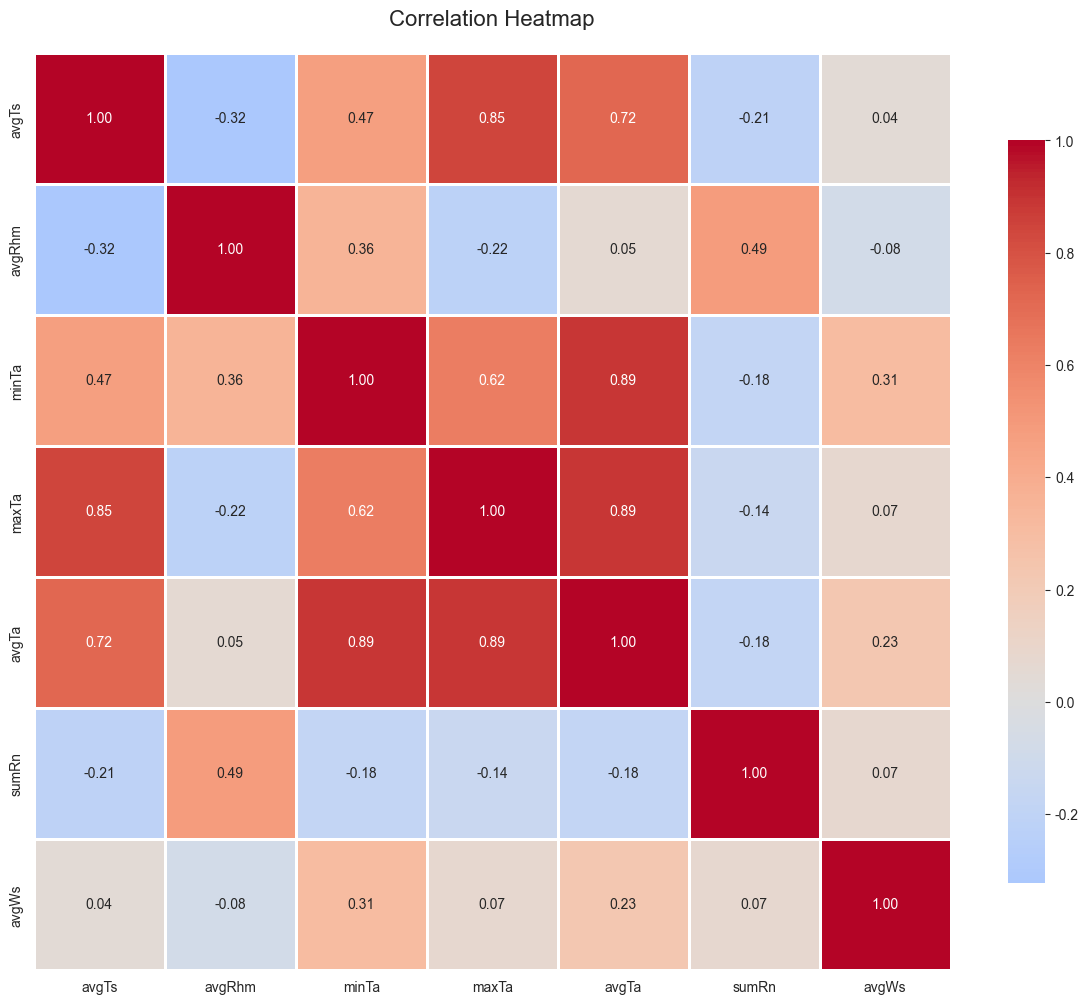

In [10]:
# 상관관계 행렬
correlation_matrix = df[numeric_columns].corr()

print("=" * 80)
print("상관관계 행렬")
print("=" * 80)
print(correlation_matrix.round(3))

# 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 10. 시계열 분석

/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/848388831.py:41: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/848388831.py:41: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/848388831.py:41: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/848388831.py:41: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/848388831.py:41: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/848388831.py:41: UserWar

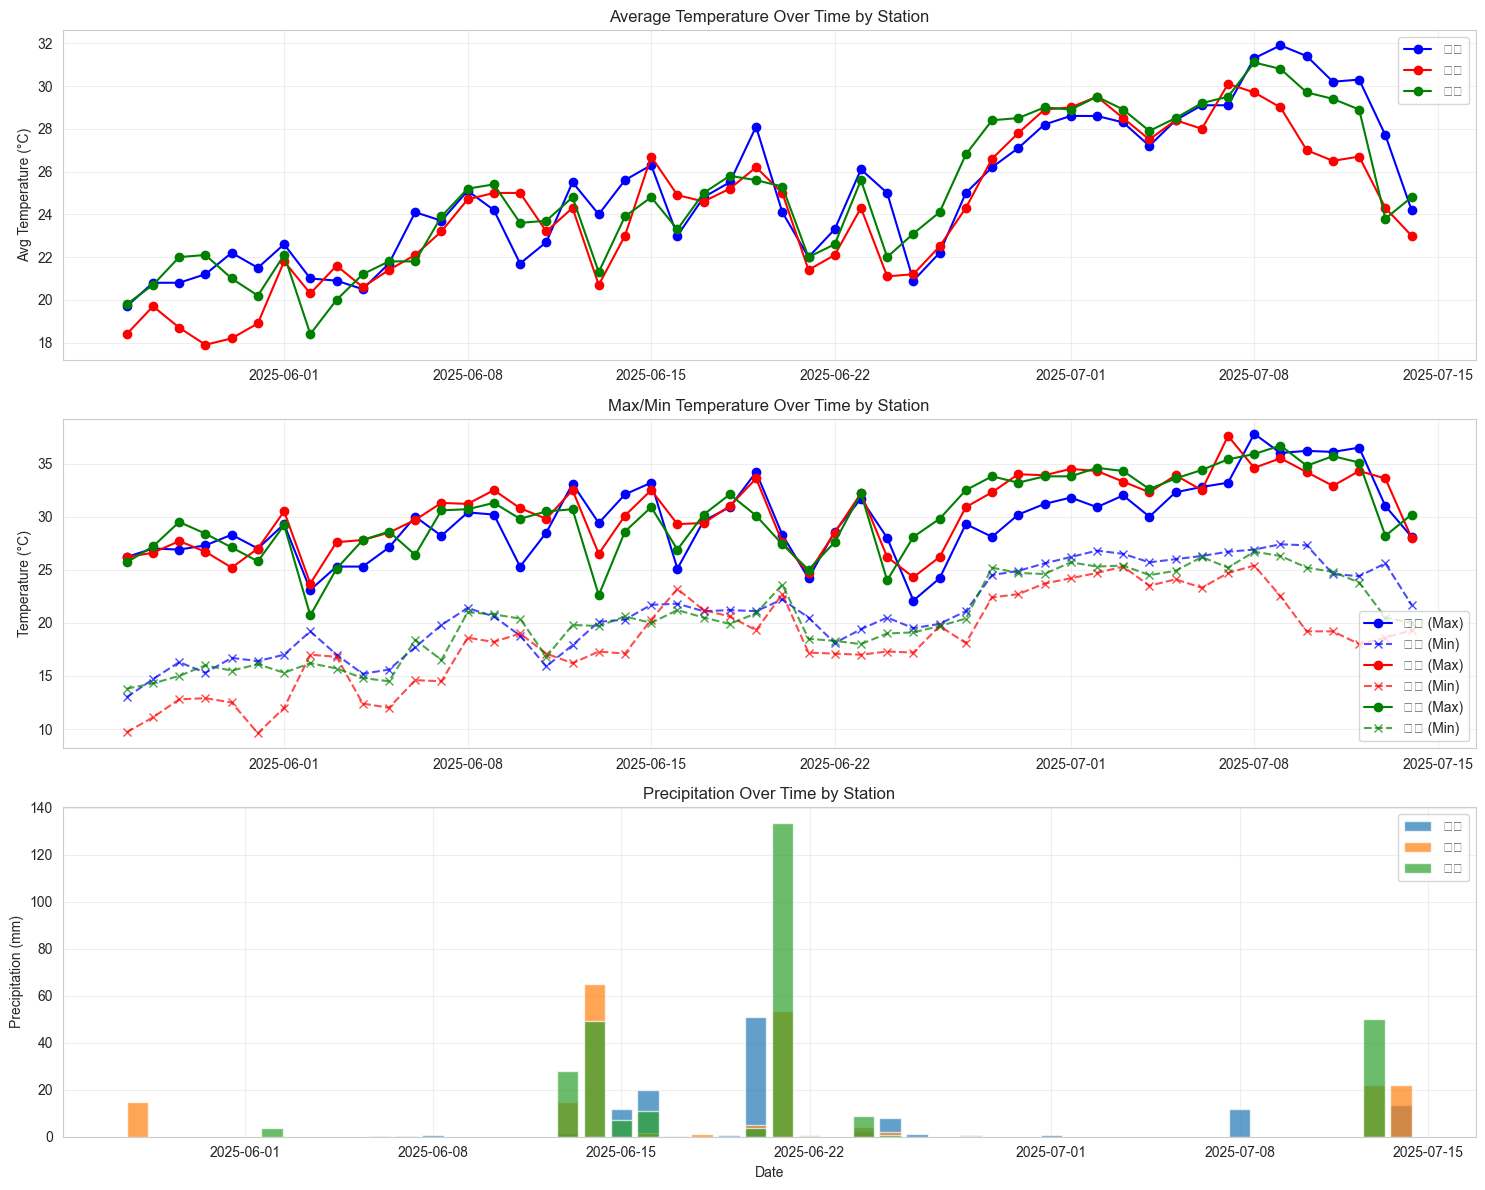

In [11]:
# 날짜별 평균 기온 추이
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 관측소별로 구분하여 시각화
stations = df['stnNm'].unique()
colors = ['blue', 'red', 'green']

for idx, station in enumerate(stations):
    station_data = df[df['stnNm'] == station].sort_values('tm')
    
    # 평균 기온
    axes[0].plot(station_data['tm'], station_data['avgTa'], 
                 marker='o', linestyle='-', label=station, color=colors[idx % len(colors)])
    
    # 최고/최저 기온
    axes[1].plot(station_data['tm'], station_data['maxTa'], 
                 marker='o', linestyle='-', label=f'{station} (Max)', color=colors[idx % len(colors)])
    axes[1].plot(station_data['tm'], station_data['minTa'], 
                 marker='x', linestyle='--', label=f'{station} (Min)', color=colors[idx % len(colors)], alpha=0.7)
    
    # 강수량
    axes[2].bar(station_data['tm'], station_data['sumRn'], 
                label=station, alpha=0.7, width=0.8)

axes[0].set_ylabel('Avg Temperature (°C)')
axes[0].set_title('Average Temperature Over Time by Station')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_ylabel('Temperature (°C)')
axes[1].set_title('Max/Min Temperature Over Time by Station')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].set_xlabel('Date')
axes[2].set_ylabel('Precipitation (mm)')
axes[2].set_title('Precipitation Over Time by Station')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. 관측소별 비교 (Violin Plot)

/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/289208769.py:14: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/289208769.py:14: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/289208769.py:14: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/289208769.py:14: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/289208769.py:14: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/hw/x4yw_0gx205g8zpm7rbz23840000gn/T/ipykernel_21200/289208769.py:14: UserWar

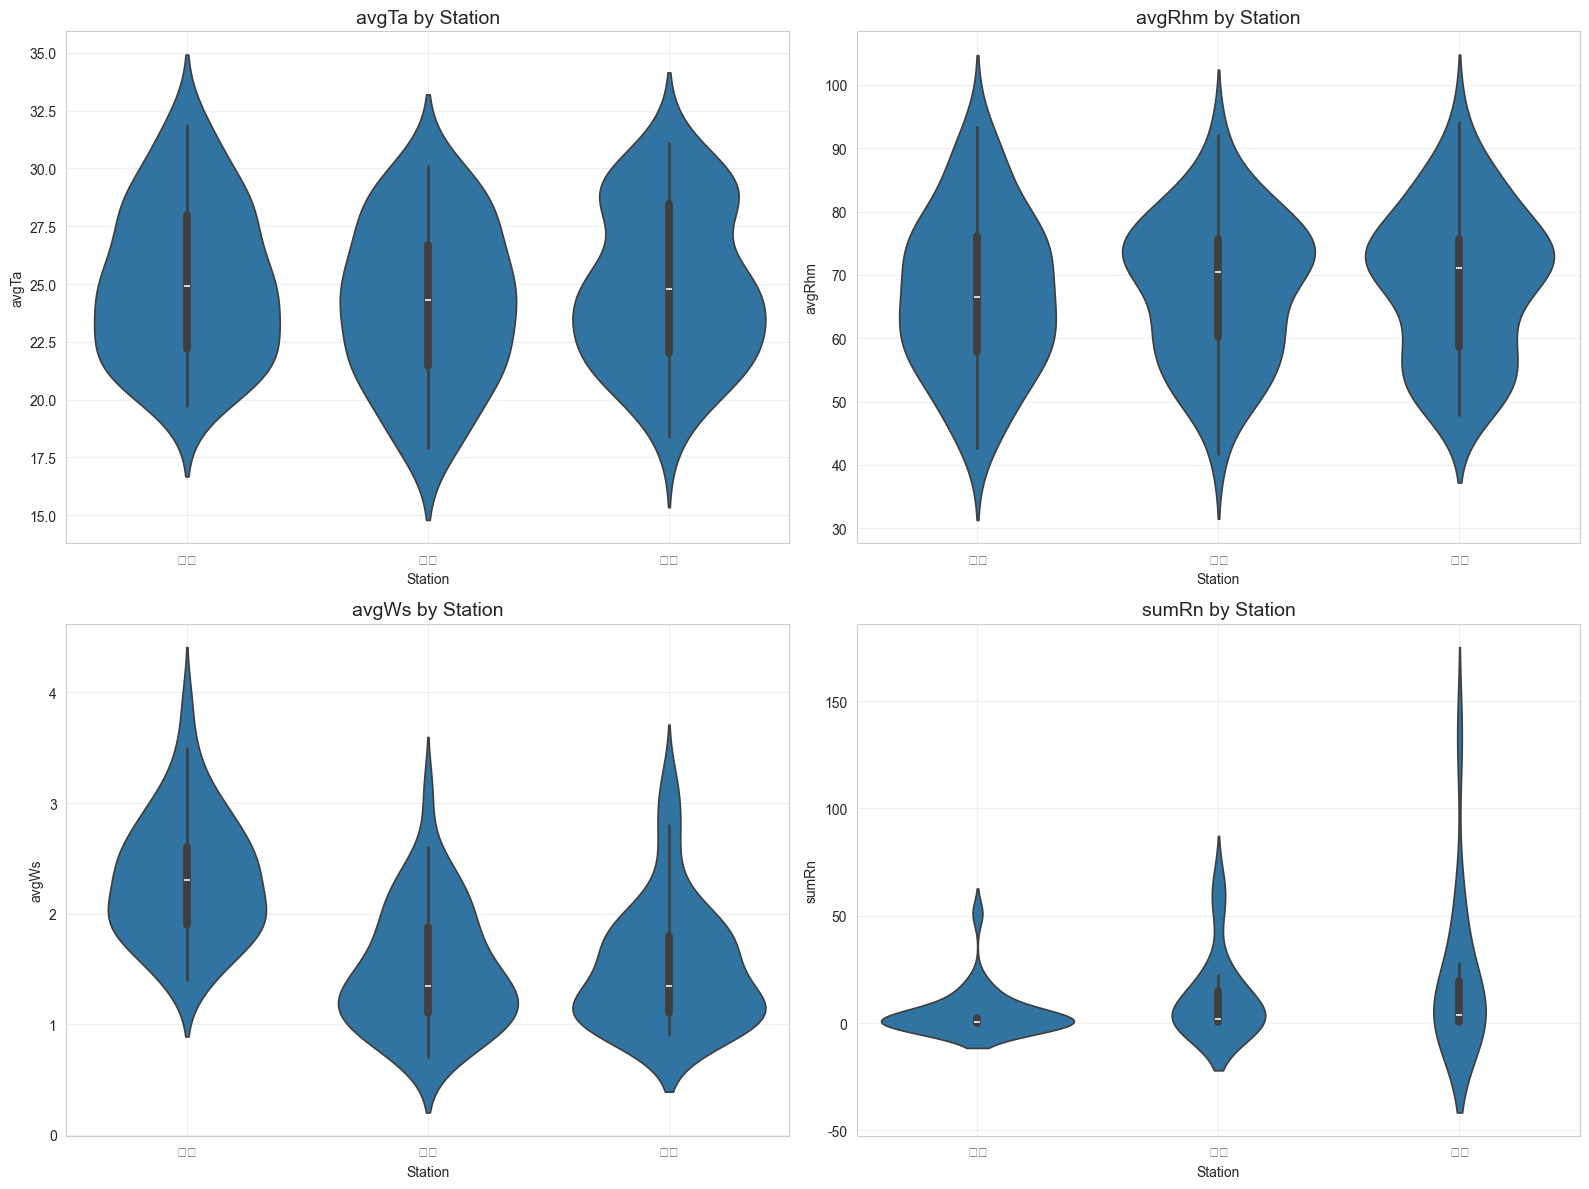

In [12]:
# 관측소별 주요 변수 비교
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

variables_to_compare = ['avgTa', 'avgRhm', 'avgWs', 'sumRn']

for idx, var in enumerate(variables_to_compare):
    sns.violinplot(data=df, x='stnNm', y=var, ax=axes[idx])
    axes[idx].set_title(f'{var} by Station', fontsize=14)
    axes[idx].set_xlabel('Station')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. 데이터 품질 요약

In [13]:
# 데이터 품질 리포트
print("=" * 80)
print("데이터 품질 요약 리포트")
print("=" * 80)

quality_report = pd.DataFrame({
    '변수명': numeric_columns,
    '전체 데이터': [len(df)] * len(numeric_columns),
    '유효 데이터': [df[col].count() for col in numeric_columns],
    '결측치': [df[col].isnull().sum() for col in numeric_columns],
    '결측 비율(%)': [(df[col].isnull().sum() / len(df) * 100).round(2) for col in numeric_columns],
    '평균': [df[col].mean().round(2) if df[col].count() > 0 else np.nan for col in numeric_columns],
    '중앙값': [df[col].median().round(2) if df[col].count() > 0 else np.nan for col in numeric_columns],
    '표준편차': [df[col].std().round(2) if df[col].count() > 0 else np.nan for col in numeric_columns],
    '최소값': [df[col].min().round(2) if df[col].count() > 0 else np.nan for col in numeric_columns],
    '최대값': [df[col].max().round(2) if df[col].count() > 0 else np.nan for col in numeric_columns]
})

print(quality_report.to_string(index=False))

print("\n" + "=" * 80)
print("기계학습을 위한 권장사항")
print("=" * 80)
print("")
print("1. 결측치 처리:")
for col in numeric_columns:
    missing_pct = (df[col].isnull().sum() / len(df) * 100)
    if missing_pct > 0:
        print(f"   - {col}: {missing_pct:.2f}% 결측치 → 평균/중앙값 대체 또는 제거 고려")

print("\n2. 스케일링:")
print("   - 변수들의 스케일이 다르므로 StandardScaler 또는 MinMaxScaler 적용 권장")

print("\n3. 이상치:")
print("   - 박스 플롯에서 확인된 이상치를 도메인 지식을 바탕으로 처리")

print("\n4. 특성 엔지니어링:")
print("   - 날짜에서 월, 요일 등의 파생 변수 생성 가능")
print("   - 기온 차이(maxTa - minTa) 등의 새로운 특성 생성 가능")

데이터 품질 요약 리포트
   변수명  전체 데이터  유효 데이터  결측치  결측 비율(%)    평균   중앙값  표준편차  최소값   최대값
 avgTs     150     150    0       0.0 29.94 29.15  4.86 21.5  39.8
avgRhm     150     150    0       0.0 67.91 69.80 11.70 41.8  94.1
 minTa     150     150    0       0.0 19.98 19.90  4.17  9.6  27.4
 maxTa     150     150    0       0.0 30.09 30.15  3.56 20.7  37.8
 avgTa     150     150    0       0.0 24.72 24.65  3.35 17.9  31.9
 sumRn     150      57   93      62.0 11.03  1.10 22.76  0.0 133.5
 avgWs     150     150    0       0.0  1.77  1.70  0.67  0.7   3.9

기계학습을 위한 권장사항

1. 결측치 처리:
   - sumRn: 62.00% 결측치 → 평균/중앙값 대체 또는 제거 고려

2. 스케일링:
   - 변수들의 스케일이 다르므로 StandardScaler 또는 MinMaxScaler 적용 권장

3. 이상치:
   - 박스 플롯에서 확인된 이상치를 도메인 지식을 바탕으로 처리

4. 특성 엔지니어링:
   - 날짜에서 월, 요일 등의 파생 변수 생성 가능
   - 기온 차이(maxTa - minTa) 등의 새로운 특성 생성 가능


## 13. 완료

데이터 분포 분석이 완료되었습니다!

### 분석 결과 요약
- 데이터셋의 기본 통계량과 분포를 확인했습니다
- 결측치 현황을 파악했습니다
- 변수 간 상관관계를 분석했습니다
- 시계열 패턴을 확인했습니다
- 관측소별 차이를 비교했습니다

이 정보들은 기계학습 모델 개발 시 데이터 전처리와 특성 선택에 유용하게 활용될 수 있습니다.